In [1]:
import pandas as pd
import geopandas as gpd
import mio
import pathlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
k25 = pd.read_excel('komb25.xlsx')
k25.head(3)

,map_name,xmin,xmax,ymin,ymax
0,Komb1011,672500,690000,290000,302000
1,Komb1012,690000,707500,290000,302000
2,Komb1031,672500,690000,278000,290000


In [3]:
tag = '1011'

In [4]:
s = k25[k25.map_name == f'Komb{tag}'].iloc[0]
xmin, ymin, xmax, ymax = s.xmin, s.ymin, s.xmax, s.ymax
xmin, ymin, xmax, ymax

(672500, 290000, 690000, 302000)

In [5]:
tifs = list(pathlib.Path('../sb_tif').glob(f'{tag}*.tif'))
tifs

[WindowsPath('../sb_tif/1011-34_raster.tif'),
 WindowsPath('../sb_tif/1011-41_raster.tif'),
 WindowsPath('../sb_tif/1011-42_raster.tif'),
 WindowsPath('../sb_tif/1011-43_raster.tif'),
 WindowsPath('../sb_tif/1011-44_raster.tif')]

In [7]:
empty = pd.DataFrame(
        columns = range(xmin, xmax, 1),
        index = range(ymax, ymin, -1),
        data = 0
)
empty.shape

(12000, 17500)

In [8]:
res = empty.copy()
for tif in tifs:
    print(tif)
    r = (
        mio.read_raster(tif)[0]
        .reindex( columns = range(xmin, xmax, 1),
                 index = range(ymax, ymin, -1),
                 fill_value = 0
                )
    )
    res = np.maximum(res, r)

..\sb_tif\1011-34_raster.tif
..\sb_tif\1011-41_raster.tif
..\sb_tif\1011-42_raster.tif
..\sb_tif\1011-43_raster.tif
..\sb_tif\1011-44_raster.tif


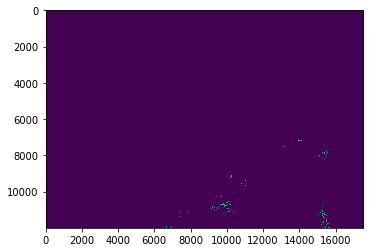

In [10]:
plt.imshow(res)

In [12]:
# uint16 becoause above sea level
mio.write_raster(res.astype('uint16'), f'../25k_sl_bui/{tag}_sl_bui.bil')